# Libraries and Utilities

In [1]:
%pip install plotly
%pip install Lifetimes
%pip install git+https://github.com/dnanhkhoa/nb_black.git


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/dnanhkhoa/nb_black.git to c:\users\shubh\appdata\local\temp\pip-req-build-nbugbirm
  Resolved https://github.com/dnanhkhoa/nb_black.git to commit 50c0f1bbfee53a7dfd76b00a6b0a5ac82a729386
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/dnanhkhoa/nb_black.git 'C:\Users\shubh\AppData\Local\Temp\pip-req-build-nbugbirm'


In [2]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import datetime
%pip install squarify
import squarify
import warnings
import pandas as pd
import numpy as np
import datetime as dt
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
%matplotlib inline
%load_ext nb_black
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
palette = 'Set2'

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<IPython.core.display.Javascript object>

# Load and Check Data

Kaggle - ecommerce dataset - UCI Machine Learning Repository - dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

In [4]:
import pandas as pd

# Define the Google Drive URL pointing directly to the CSV file
google_drive_csv_url = 'https://drive.google.com/uc?id=1G7UUb5TKx2z0HUoHhGo6v4hBXZW-LtjM'

# Read the CSV file directly into a DataFrame
df = pd.read_csv(google_drive_csv_url,
                 header=0,
                 encoding='unicode_escape',
                 dtype={'CustomerID': str, 'InvoiceID': str},
                 parse_dates=['InvoiceDate'],
                 infer_datetime_format=True)

# Display the first few rows of the DataFrame
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom  


<IPython.core.display.Javascript object>

Variable Description

InvoiceNo: Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product code that consists 5 digits.

Description: Product name.

Quantity: The quantities of each product per transaction.

InvoiceDate: Represents the day and time when each transaction was generated.

UnitPrice: Product price per unit.

CustomerID: Customer number that consists 5 digits. Each customer has a unique customer ID.

Country: Name of the country where each customer resides.

In [5]:
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70, '-'))
    print(f'Rows: {dataframe.shape[0]}')
    print(f'Columns: {dataframe.shape[1]}')
    print(" TYPES ".center(70, '-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70, '-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70, '-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70, '-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70, '-'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(70, '-'))
    numeric_df = dataframe.select_dtypes(include='number')
    print(numeric_df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
# check_data(df)

<IPython.core.display.Javascript object>

In [6]:
import plotly.graph_objs as go
from plotly.offline import iplot

world_map = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count().reset_index(drop=False)
countries = world_map['Country'].value_counts()
data = dict(type='choropleth',
            locations=countries.index,
            locationmode='country names',
            z=countries,
            text=countries.index,
            colorbar={'title': 'Orders'},
            colorscale='Viridis',
            reversescale=False)

layout = dict(title={'text': "Number of Orders by Countries",
                     'y': 0.9,
                     'x': 0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
              geo=dict(resolution=50,
                       showocean=True,
                       oceancolor="LightBlue",
                       showland=True,
                       landcolor="whitesmoke",
                       showframe=True),
              template='plotly_white',
              height=600,
              width=1000)

choromap = go.Figure(data=[data], layout=layout)
iplot(choromap, validate=False)


<IPython.core.display.Javascript object>

Descriptive Statistics

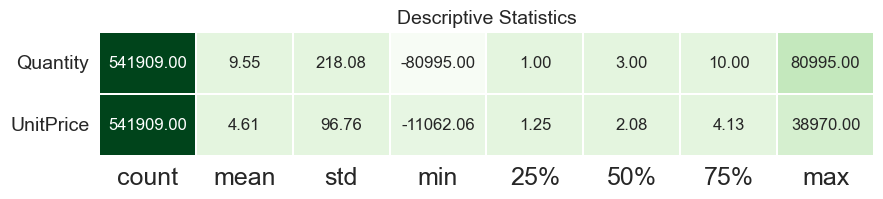

<IPython.core.display.Javascript object>

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def desc_stats(dataframe):
    desc_df = pd.DataFrame(index=dataframe.columns,
                           columns=dataframe.describe().T.columns,
                           data=dataframe.describe().T)

    f, ax = plt.subplots(figsize=(10, desc_df.shape[0] * 0.81))
    sns.heatmap(desc_df,
                annot=True,
                cmap="Greens",
                fmt='.2f',
                ax=ax,
                linecolor='white',
                linewidths=1.1,
                cbar=False,
                annot_kws={"size": 12})
    plt.xticks(size=18)
    plt.yticks(size=14, rotation=0)
    plt.title("Descriptive Statistics", size=14)
    plt.show()

desc_stats(df.select_dtypes(include = [float, int]))



📌 It is clearly seems that there are ouliters in Quantity and UnitPrice that have to be handled

📌 There are negative values in UnitPrice and Quantity because of cancelled orders.

📌 Missing values in Customer ID and Description.

📌 Quantity and Unit Price should be multiplied in order to create Total Price.

# Data Preprocessing

In [8]:
def replace_with_thresholds(dataframe, variable, q1 = 0.25, q3 = 0.75):

    '''
    Detects outliers with IQR method and replaces with thresholds

    '''

    df_ = dataframe.copy()
    quartile1 = df_[variable].quantile(q1)
    quartile3 = df_[variable].quantile(q3)
    iqr = quartile3 - quartile1

    up_limit = quartile3 + 1.5 * iqr
    low_limit = quartile1 - 1.5 * iqr
    df_.loc[(df_[variable] < low_limit), variable] = low_limit
    df_.loc[(df_[variable] > up_limit), variable] = up_limit

    return df_

def ecommerce_preprocess(dataframe):
    df_ = dataframe.copy()

    #Missing Values
    df_ = df_.dropna()

    #Cancelled Orders & Quantity
    df_ = df_[~df_['InvoiceNo'].str.contains('C', na = False)]
    df_ = df_[df_['Quantity'] > 0]

    #Replacing Outliers
    df_ = replace_with_thresholds(df_, "Quantity", q1 = 0.01, q3 = 0.99)
    df_ = replace_with_thresholds(df_, "UnitPrice", q1 = 0.01, q3 = 0.99)

    #Total Price
    df_["TotalPrice"] = df_["Quantity"] * df_["UnitPrice"]

    return df_

<IPython.core.display.Javascript object>

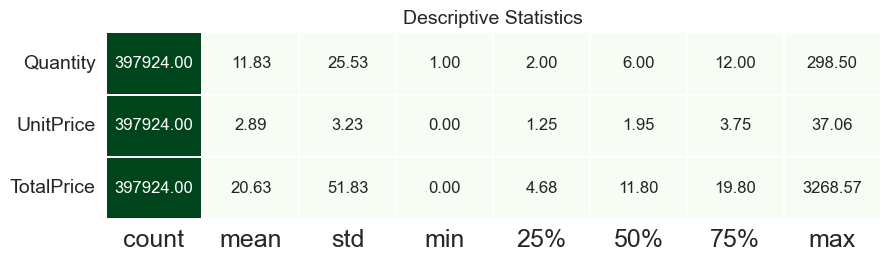

<IPython.core.display.Javascript object>

In [9]:
df = ecommerce_preprocess(df)

desc_stats(df.select_dtypes(include = [float, int]))

# RFM Analysis

RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.

RFM factors illustrate these facts:

The more recent the purchase, the more responsive the customer is to promotions

The more frequently the customer buys, the more engaged and satisfied they are

Monetary value differentiates heavy spenders from low-value purchasers

RFM Metrics

In [10]:
print(df['InvoiceDate'].max())

2011-12-09 12:50:00


<IPython.core.display.Javascript object>

In [11]:
import datetime as dt

today_date = dt.datetime(2011, 12, 11)

rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                                    'InvoiceNo': lambda x: x.nunique(),
                                    'TotalPrice': lambda x: x.sum()})

rfm.columns = ['recency', 'frequency', 'monetary']
rfm = rfm[rfm['monetary'] > 0]
rfm = rfm.reset_index()

rfm.head()


,CustomerID,recency,frequency,monetary
0,12346,326,1,310.44
1,12347,3,7,4310.00
2,12348,76,4,1770.78
3,12349,19,1,1491.72
4,12350,311,1,331.46


<IPython.core.display.Javascript object>

RFM Scores

In [12]:
def get_rfm_scores(dataframe) -> pd.core.frame.DataFrame:

    df_ = dataframe.copy()
    df_["recency_score"] = pd.qcut(df_["recency"], 5, labels=[5, 4, 3, 2, 1])
    df_["frequency_score"] = pd.qcut(
        df_["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5]
    )
    df_["monetary_score"] = pd.qcut(df_["monetary"], 5, labels=[1, 2, 3, 4, 5])
    df_["RFM_SCORE"] = df_["recency_score"].astype(str) + df_["frequency_score"].astype(
        str
    )

    return df_


rfm = get_rfm_scores(rfm)

<IPython.core.display.Javascript object>

Segmentation

In [13]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex = True)

rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12346,326,1,310.44,1,1,2,11,hibernating
1,12347,3,7,4310.00,5,5,5,55,champions
2,12348,76,4,1770.78,2,4,4,24,at_Risk
3,12349,19,1,1491.72,4,1,4,41,promising
4,12350,311,1,331.46,1,1,2,11,hibernating


<IPython.core.display.Javascript object>

Segmentation Map

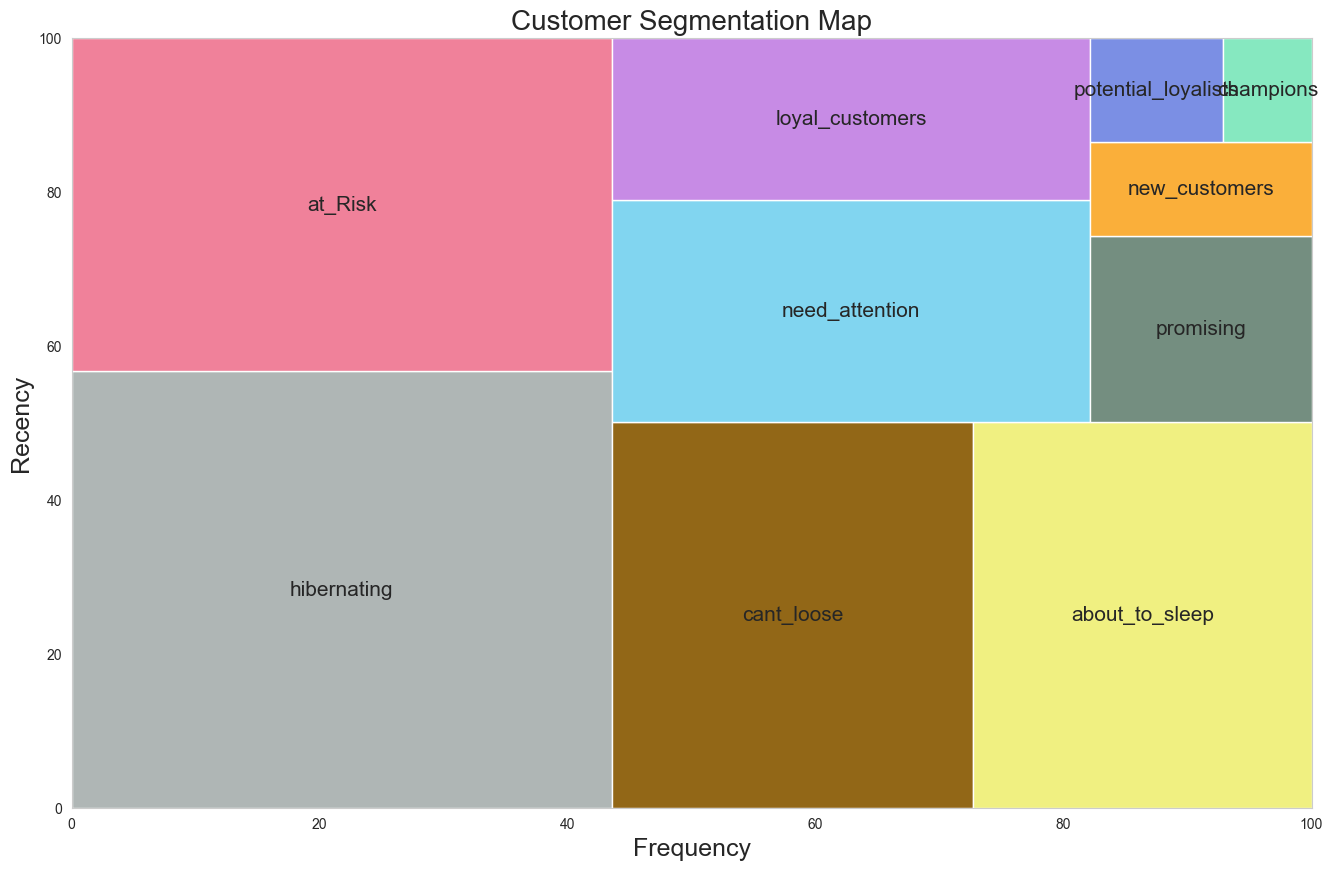

<IPython.core.display.Javascript object>

In [14]:
import squarify
import matplotlib.pyplot as plt

segments = rfm["segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()


Model Evaluation

In [15]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score # type: ignore

print(' RFM Model Evaluation '.center(70, '='))
X = rfm[['recency_score', 'frequency_score']]
labels = rfm['segment']
print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"="}')


======================== RFM Model Evaluation ========================
Number of Observations: 4338
Number of Segments: 10
Silhouette Score: 0.471
Calinski Harabasz Score: 4590.526
Davies Bouldin Score: 0.633 


<IPython.core.display.Javascript object>

Segment Analysis

In [16]:
rfm[['recency','monetary','frequency','segment']]\
.groupby('segment')\
.agg({'mean','std','max','min'})

recency                           monetary              \
                           std  max        mean min           std         max   
segment                                                                         
about_to_sleep       10.943474   72   53.312500  34    533.161343    6207.670   
at_Risk              68.618828  374  153.785835  73    943.170824   11072.670   
cant_loose           65.250378  373  132.968254  73   2008.352354   10254.180   
champions             3.683300   13    6.361769   1  18366.105822  266163.525   
hibernating          92.013560  374  217.605042  73    553.714975    9182.345   
loyal_customers      15.577050   72   33.608059  15   5405.787839  120210.355   
need_attention       11.552074   72   52.427807  34    732.298552    4353.830   
new_customers         3.902112   13    7.428571   1    174.620952     848.550   
potential_loyalists   9.338808   33   17.398760   1    601.746293    4628.750   
promising             5.192519   33   23.510638  15    223.634736    1491.720   

                                          frequency                      
                            mean     min        std  max       mean min  
segment                                                                  
about_to_sleep        469.058097    6.20   0.368913    2   1.161932   1  
at_Risk               938.458341   52.00   0.954415    6   2.878583   2  
cant_loose           2646.822540   70.02   4.289630   34   8.380952   6  
champions            6498.612978  198.23  16.476484  210  12.417062   3  
hibernating           398.573036    3.75   0.302492    2   1.101774   1  
loyal_customers      2752.519574   36.56   4.545669   63   6.479853   3  
need_attention        847.657086    6.90   0.470081    3   2.326203   2  
new_customers         314.883690   89.94   0.000000    1   1.000000   1  
potential_loyalists   674.628357   20.80   0.651401    3   2.010331   1  
promising             285.623723   30.00   0.000000    1   1.000000   1

<IPython.core.display.Javascript object>

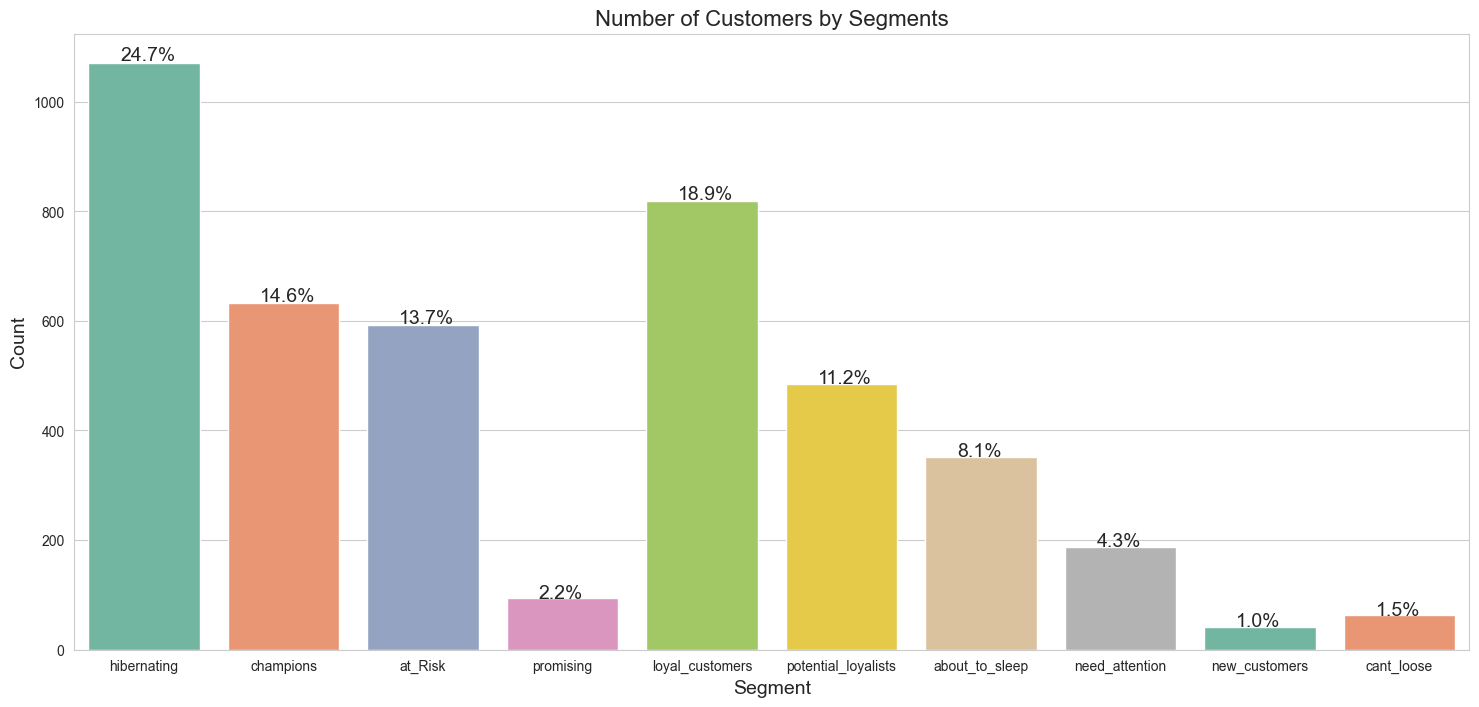

<IPython.core.display.Javascript object>

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
ax = sns.countplot(data=rfm,
                   x='segment',
                   palette='Set2')  # Example of using a predefined seaborn palette
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size=14)
plt.title('Number of Customers by Segments', size=16)
plt.xlabel('Segment', size=14)
plt.ylabel('Count', size=14)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()


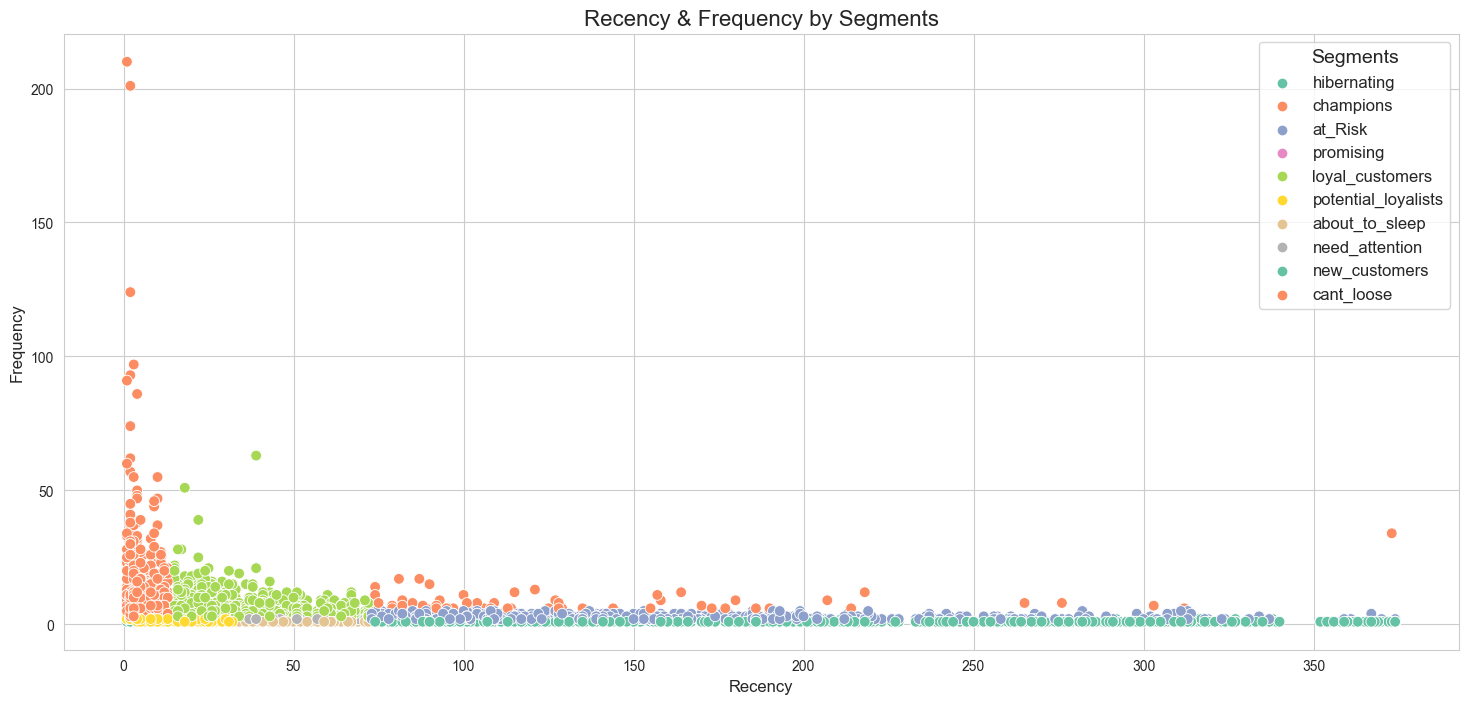

<IPython.core.display.Javascript object>

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
sns.scatterplot(
    data=rfm, x="recency", y="frequency", hue="segment", palette="Set2", s=60
)
plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)
plt.show()


<Figure size 1800x800 with 0 Axes>

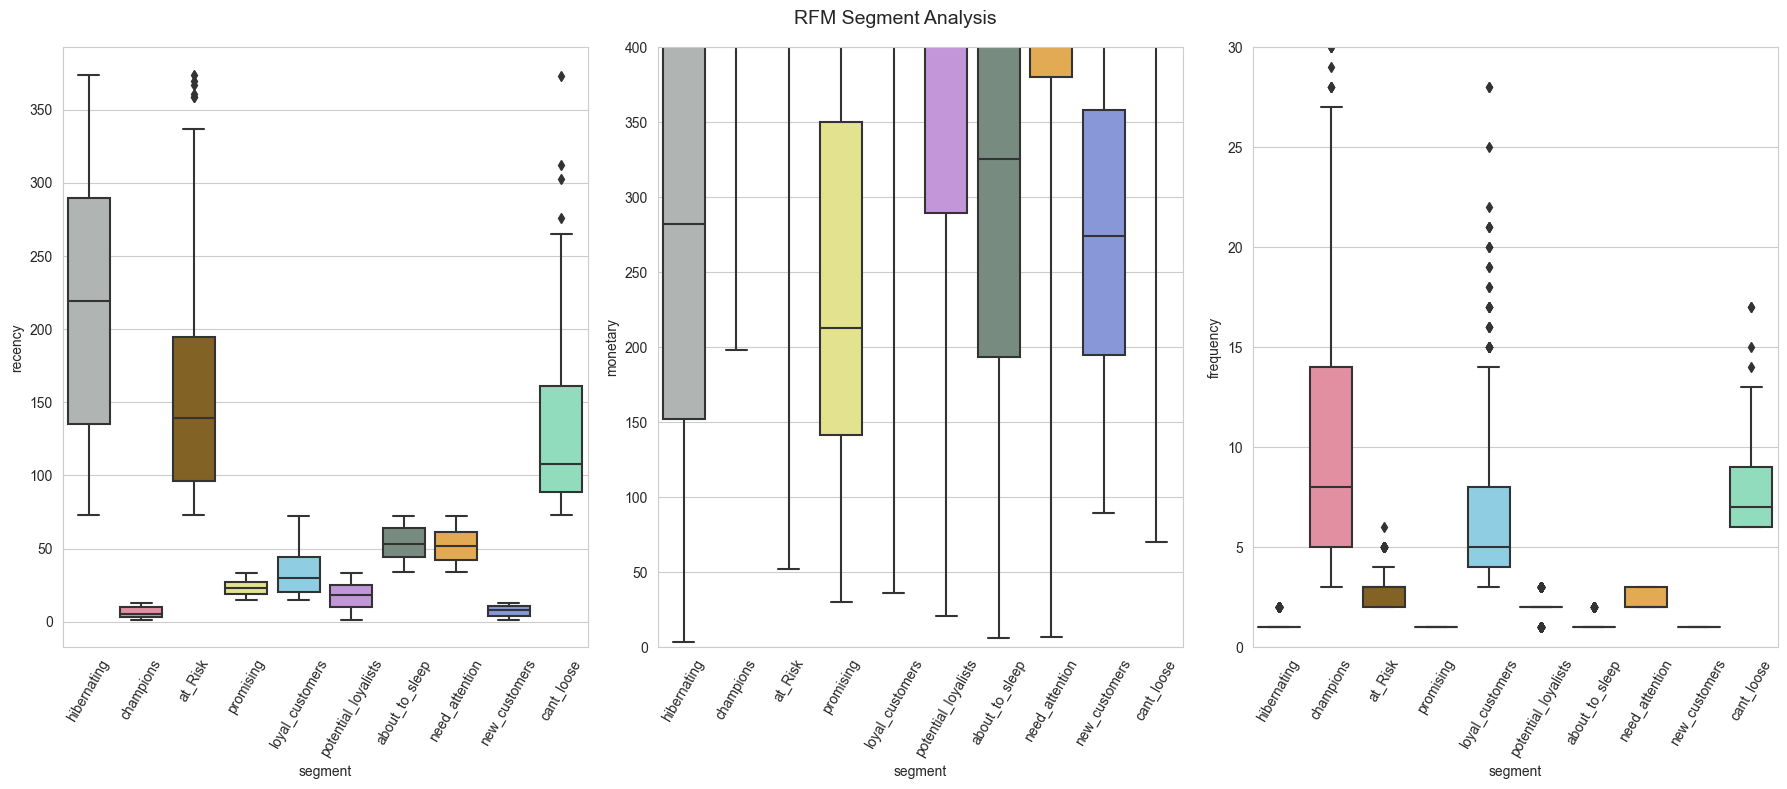

<IPython.core.display.Javascript object>

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define or import the palette with the same colors used in the reference code
palette = ["#AFB6B5", "#F0819A", "#926717", "#F0F081", "#81D5F0",
           "#C78BE5", "#748E80", "#FAAF3A", "#7B8FE4", "#86E8C0"]

plt.figure(figsize=(18, 8))
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("RFM Segment Analysis", size=14)
feature_list = ["recency", "monetary", "frequency"]
for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=rfm, x="segment", y=feature_list[idx], palette=palette
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0, 400])
    if idx == 2:
        axes[idx].set_ylim([0, 30])
plt.tight_layout()
plt.show()


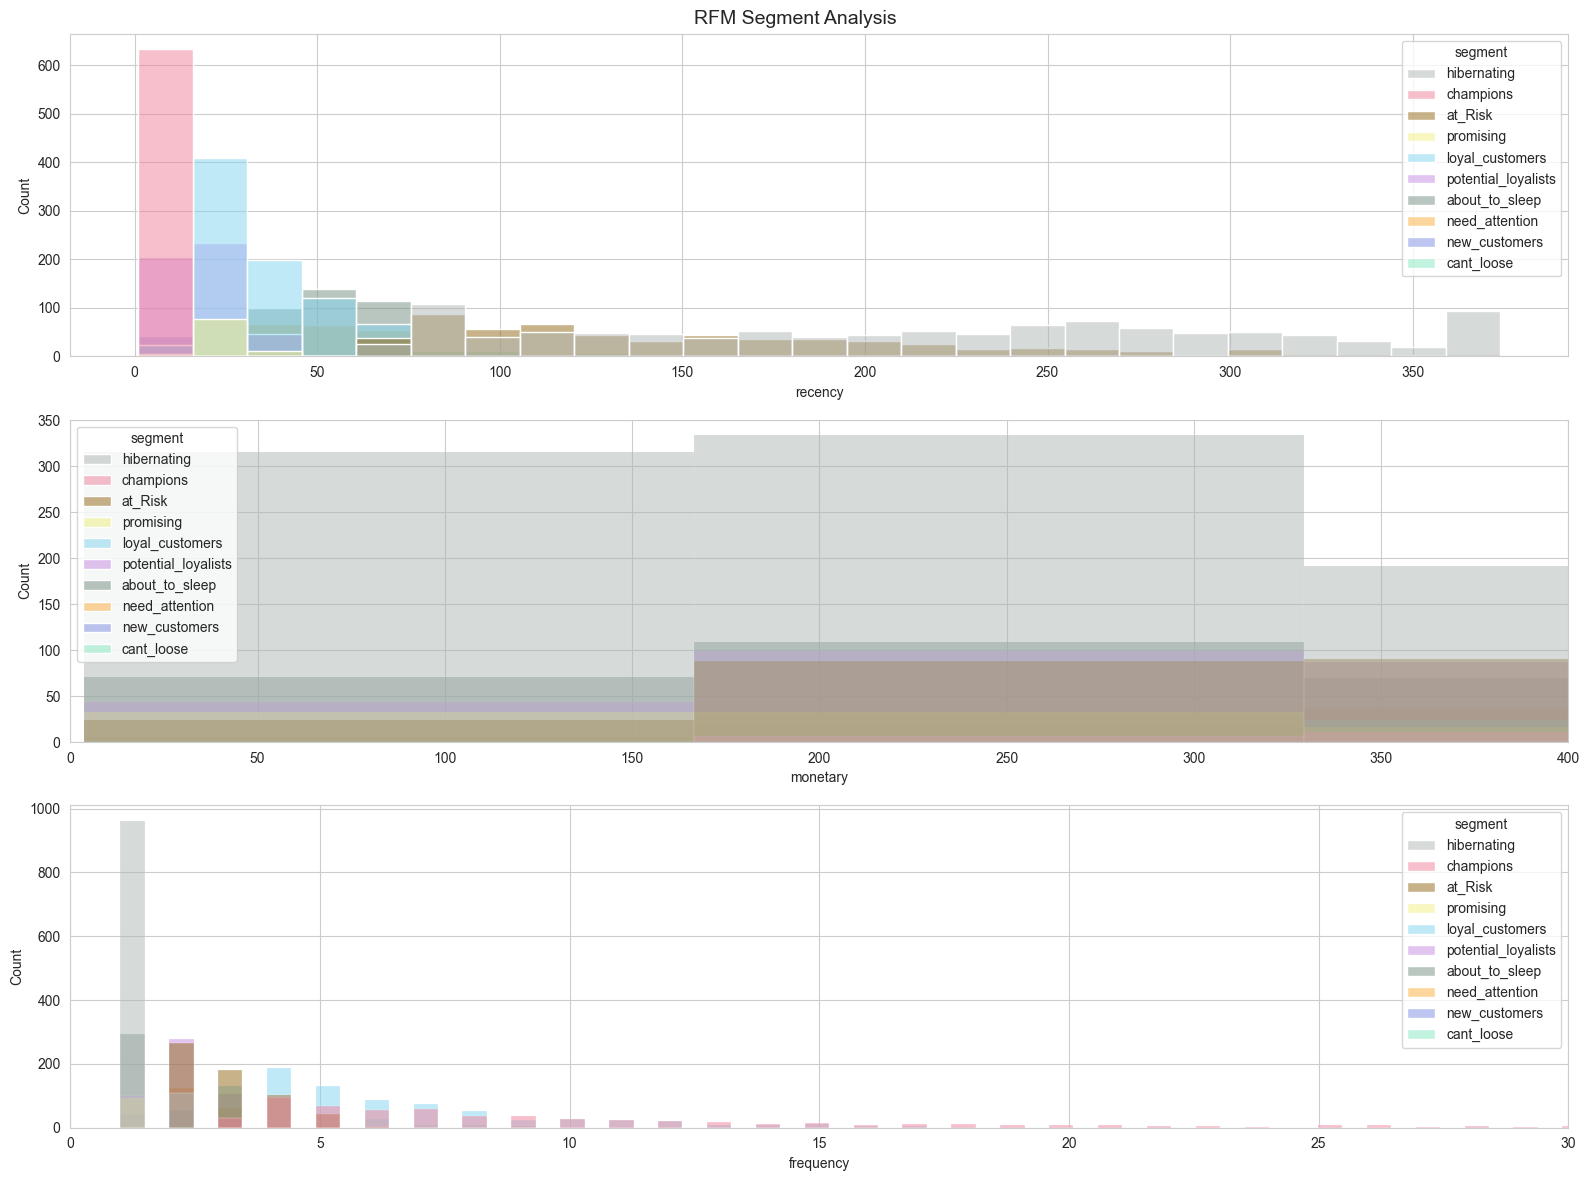

<IPython.core.display.Javascript object>

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('RFM Segment Analysis', size = 14)
feature_list = ['recency', 'monetary', 'frequency']
for idx, col in enumerate(feature_list):
    sns.histplot(ax = axes[idx], data = rfm,
                 hue = 'segment', x = feature_list[idx],
                 palette= palette)
    if idx == 1:
        axes[idx].set_xlim([0, 400])
    if idx == 2:
        axes[idx].set_xlim([0, 30])
plt.tight_layout()
plt.show()

# Cohort Analysis

A cohort is a group of people sharing something in common, such as the sign-up date to an app, the month of the first purchase, geographical location, acquisition channel (organic users, coming from performance marketing, etc.) and so on. In Cohort Analysis, we track these groups of users over time, to identify some common patterns or behaviors.

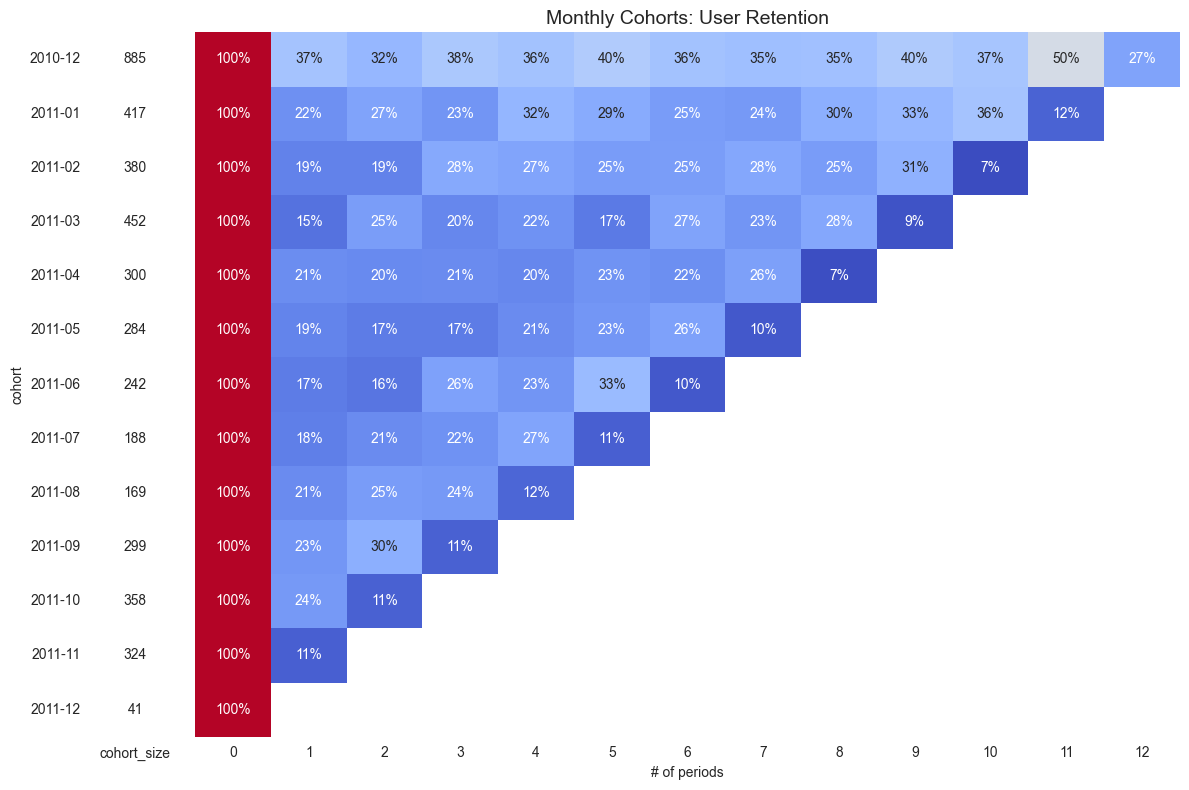

<IPython.core.display.Javascript object>

In [21]:
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

def CohortAnalysis(dataframe):
    data = dataframe.copy()
    data = data[["CustomerID", "InvoiceNo", "InvoiceDate"]].drop_duplicates()
    data["order_month"] = data["InvoiceDate"].dt.to_period("M")
    data["cohort"] = (
        data.groupby("CustomerID")["InvoiceDate"].transform("min").dt.to_period("M")
    )
    cohort_data = (
        data.groupby(["cohort", "order_month"])
        .agg(n_customers=("CustomerID", "nunique"))
        .reset_index(drop=False)
    )
    cohort_data["period_number"] = (cohort_data.order_month - cohort_data.cohort).apply(
        attrgetter("n")
    )
    cohort_pivot = cohort_data.pivot_table(
        index="cohort", columns="period_number", values="n_customers"
    )
    cohort_size = cohort_pivot.iloc[:, 0]
    retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
    with sns.axes_style("white"):
        fig, ax = plt.subplots(
            1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios": [1, 11]}
        )
        sns.heatmap(
            retention_matrix,
            mask=retention_matrix.isnull(),
            annot=True,
            cbar=False,
            fmt=".0%",
            cmap="coolwarm",
            ax=ax[1],
        )
        ax[1].set_title("Monthly Cohorts: User Retention", fontsize=14)
        ax[1].set(xlabel="# of periods", ylabel="")
        white_cmap = mcolors.ListedColormap(["white"])
        sns.heatmap(
            pd.DataFrame(cohort_size).rename(columns={0: "cohort_size"}),
            annot=True,
            cbar=False,
            fmt="g",
            cmap=white_cmap,
            ax=ax[0],
        )
        fig.tight_layout()

CohortAnalysis(df)


# Customer Lifetime Value

Customer lifetime value is how much money a customer will bring your brand throughout their entire time as a paying customer.

In [22]:
cltv_df = df.groupby("CustomerID").agg(
    {
        "InvoiceDate": [
            lambda x: (x.max() - x.min()).days,
            lambda x: (today_date - x.min()).days,
        ],
        "InvoiceNo": "nunique",
        "TotalPrice": "sum",
    }
)

cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ["recency", "T", "frequency", "monetary"]
cltv_df.head()

,recency,T,frequency,monetary
CustomerID,,,,
12346,0,326,1,310.44
12347,365,368,7,4310.00
12348,282,359,4,1770.78
12349,0,19,1,1491.72
12350,0,311,1,331.46


<IPython.core.display.Javascript object>

In [23]:
#Average Order Value
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

#Recency & Tenure
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7

#Frequency
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

<IPython.core.display.Javascript object>

# BG/NBD

Beta Geometric / Negative Binomial Distribution models assume that the number of transactions made by each customer follows a Poisson process with a heterogeneity in transaction rates across customers following a gamma distribution. These assumptions give us a Negative binomial distribution (NBD) for modeling the number of transactions made by the customer while he is alive. We can build BG/NBD model by using BetaGeoFitter and lifetimes packages.

In [24]:
%pip install lifetimes

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



<IPython.core.display.Javascript object>

In [25]:
from lifetimes import BetaGeoFitter # type: ignore

BGF = BetaGeoFitter(penalizer_coef=0.001)  # avoid overfitting

BGF.fit(cltv_df["frequency"], cltv_df["recency"], cltv_df["T"])


<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.12, alpha: 11.40, b: 2.49, r: 2.18>

<IPython.core.display.Javascript object>

Top 10 Expected Number of Transaction (1 Week)

In [26]:
BGF.conditional_expected_number_of_purchases_up_to_time(
    1, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Expected Number of Transactions"
).reset_index()

,CustomerID,Expected Number of Transactions
0,12748,3.265158
1,14911,3.126645
2,17841,1.940290
3,13089,1.537528
4,14606,1.463999
5,15311,1.433717
6,12971,1.357024
7,14646,1.222517
8,13408,0.986249
9,18102,0.968607


<IPython.core.display.Javascript object>

Top 10 Expected Number of Transaction (1 Month)

In [27]:
BGF.conditional_expected_number_of_purchases_up_to_time(
    4, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Expected Number of Transactions"
).reset_index()

,CustomerID,Expected Number of Transactions
0,12748,13.025670
1,14911,12.473095
2,17841,7.740345
3,13089,6.133456
4,14606,5.840269
5,15311,5.719467
6,12971,5.413481
7,14646,4.876360
8,13408,3.934373
9,18102,3.863856


<IPython.core.display.Javascript object>

Frequency of Repeat Transactions

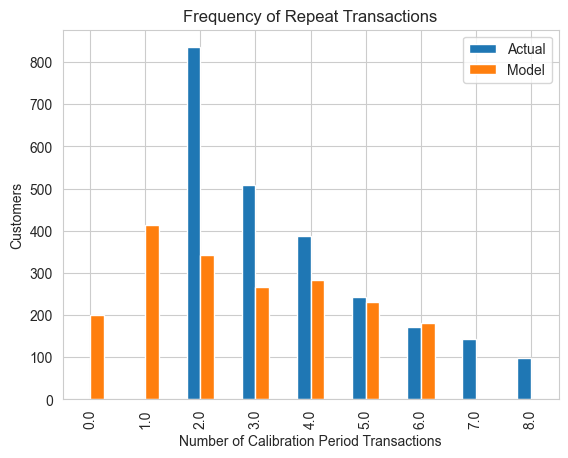

<IPython.core.display.Javascript object>

In [28]:
from lifetimes.plotting import plot_period_transactions # type: ignore

# Plot a figure with period actual and predicted transactions.
plot_period_transactions(BGF, max_frequency=7)
plt.show()
